In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████| 6.29M/6.29M [00:02<00:00, 2.71MB/s]


In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

# Get the columns name and columns number in the table
#columns_block=soup.find('tr')

columns_list=soup.find_all('th')
columns=[]
for column in columns_list:
    columns.append(column.text)

col_num=len(columns)

#### Scrape data and make a list array

In [5]:
# Init a empty list array
datalist=[]
for i in range(col_num):
    datalist.append([])

# Find all rows
row_blocks = soup.find_all('tr',class_='data-row')

# Every row
for row in row_blocks:
    # Every column
    datas =row.find_all('td')

    # Fill the list array
    j=0
    for data in datas:
        datalist[j].append(data.text)
        j=j+1 

#### Combine the list array to a dataframe

In [6]:
# Init a empty dataframe
df=pd.DataFrame([],[])
# Add every column to dataframe
for i in range(col_num):
    df[f'{columns[i]}']=datalist[i]

In [7]:
df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


#### Set the data type

In [10]:
# Set the data type of columns
new_df=df.astype({'id':'int32',
        'terrestrial_date':'datetime64[ns]',
        'sol':'int32',
        'ls':'int32',
        'month':'int32',
        'min_temp':'float',
        'pressure':'float'}.copy()
    ) 
new_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### How many months exist on Mars?

In [11]:
month=list(new_df['month'].unique())

print(f'There are {len(month)} months on Mars.')

There are 12 months on Mars.


### How many Martian (and not Earth) days' worth of data exist in the scraped dataset?

In [12]:
day=list(new_df['sol'].unique())

print(f'There are {len(day)} Martian days worth of data exist in the scraped dataset')

There are 1867 Martian days worth of data exist in the scraped dataset


### What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

In [13]:
gy=new_df.groupby(by=["month"]).mean()

min_temp=list(gy['min_temp'])
max_t=max(min_temp)
min_t=min(min_temp)
index_max = min_temp.index(max_t)
index_min = min_temp.index(min_t)
print(f'The coldest months on Mars is {index_min+1}.')
print(f'The warmest months on Mars is {index_max+1}.')

The coldest months on Mars is 3.
The warmest months on Mars is 8.


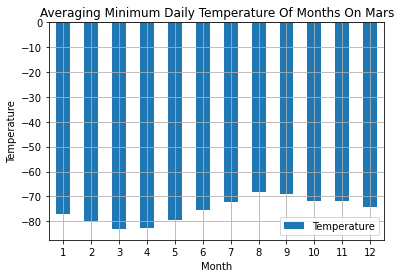

In [14]:
gy.reset_index('month',inplace=True)
temp_df=pd.DataFrame({'Month':list(gy['month']), 'Temperature':list(gy['min_temp'])})
temp_df.set_index('Month',inplace=True)

temp_df.plot.bar(title='Averaging Minimum Daily Temperature Of Months On Mars',xlabel='Month',ylabel='Temperature',rot=0,grid=True)
plt.show()

### Which months have the lowest and the highest atmospheric pressure on Mars? 

In [15]:
gy=new_df.groupby(by=["month"]).mean()

pressure=list(gy['pressure'])
max_p=max(pressure)
min_p=min(pressure)
index_max = pressure.index(max_p)
index_min = pressure.index(min_p)
print(f'The lowest atmospheric pressure month on Mars is {index_min+1}.')
print(f'The highest atmospheric pressureon month on Mars is {index_max+1}.')

The lowest atmospheric pressure month on Mars is 6.
The highest atmospheric pressureon month on Mars is 9.


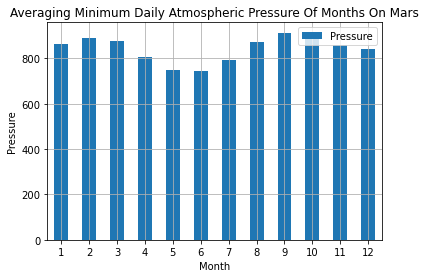

In [16]:
gy.reset_index('month',inplace=True)
pres_df=pd.DataFrame({'Month':list(gy['month']), 'Pressure':list(gy['pressure'])})
pres_df.set_index('Month',inplace=True)

pres_df.plot.bar(title='Averaging Minimum Daily Atmospheric Pressure Of Months On Mars',xlabel='Month',ylabel='Pressure',rot=0,grid=True)
plt.show()

### According the scatter plot, two Earth years, almost 730 terrestrial (Earth) days exist in a Martian year.

<Figure size 576x288 with 0 Axes>

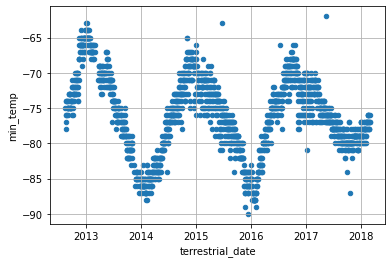

In [47]:
from scipy.stats import linregress

plt.figure(figsize=(8,4))
temp_df=new_df[['terrestrial_date','min_temp']]
temp_df.plot.scatter(x='terrestrial_date',y='min_temp',grid=True)
plt.show()


In [28]:
df.to_csv('mars_data.csv')